#ATIVIDADE de IA

Jose Rodrigo Araujo Limeira

>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# abrindo o dataset Iris
iris = load_iris()
features_array = pd.DataFrame(iris.dataset_raw, columns=iris.feature_names)
labels_array = pd.Series(iris.target).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
features_array = pd.DataFrame(iris.dataset_raw, columns=iris.feature_names)
features_array

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
labels_array = pd.Series(iris.target).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
labels_array

,0
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


In [ ]:
# Iremos separar nossos conjunto de dados em dois conjuntos:
# - TREINO: para ensinar o algoritmo (70% dos conjunto de dados)
# - TESTE: para avaliar o algoritmo em conjunto de dados que ele nunca viu (30% dos conjunto de dados)
# `random_state=42` garante que a separação seja sempre a mesma, para reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, random_state=42)

In [ ]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [ ]:
print(f"\nDados carregados e divididos:")
print(f" - Tamanho do conjunto de treino: {len(X_train)} amostras")
print(f" - Tamanho do conjunto de teste: {len(X_test)} amostras")


Dados carregados e divididos:
 - Tamanho do conjunto de treino: 105 amostras
 - Tamanho do conjunto de teste: 45 amostras


In [ ]:
# Criando o algoritmo da árvore
arvore = DecisionTreeClassifier(random_state=42)

# Treinando o algoritmo com os conjunto de dados de TREINO
arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Fazendo previsões nos conjunto de dados de TREINO e de TESTE
pred_treino_arvore = arvore.predict(X_train)
pred_teste_arvore = arvore.predict(X_test)

In [ ]:
# Avaliando a performance
acc_treino_arvore = accuracy_score(y_train, pred_treino_arvore)
acc_teste_arvore = accuracy_score(y_test, pred_teste_arvore)

In [ ]:
acc_treino_arvore

1.0

In [ ]:
acc_teste_arvore

1.0

In [ ]:
print(f"Acurácia no TREINO: {acc_treino_arvore:.4f} (Perfeito!)")
print(f"Acurácia no TESTE:  {acc_teste_arvore:.4f} (Bom, mas caiu bastante)")
print("\nOVERFITTING: a árvore 'decorou' os dados de treino (100% de acerto),")
print("mas sua performance caiu em dados novos (não vistos no treinamento), pois ela é muito específica.")


Acurácia no TREINO: 1.0000 (Perfeito!)
Acurácia no TESTE:  1.0000 (Bom, mas caiu bastante)

OVERFITTING: a árvore 'decorou' os dados de treino (100% de acerto),
mas sua performance caiu em dados novos (não vistos no treinamento), pois ela é muito específica.


In [ ]:
# Agora, Iremos ajustar o algoritmo uma floresta com 100 árvores e comparar.

print("\n--- Treinando uma FLORESTA ALEATÓRIA ---")

# Criando o algoritmo da floresta (com 100 árvores)
floresta = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o algoritmo com os mesmos conjunto de dados de TREINO
floresta.fit(X_train, y_train)


--- Treinando uma FLORESTA ALEATÓRIA ---


RandomForestClassifier(random_state=42)

In [ ]:
# Fazendo previsões nos conjunto de dados de TREINO e de TESTE
pred_treino_floresta = floresta.predict(X_train)
pred_teste_floresta = floresta.predict(X_test)

In [ ]:
# Avaliando a performance
acc_treino_floresta = accuracy_score(y_train, pred_treino_floresta)
acc_teste_floresta = accuracy_score(y_test, pred_teste_floresta)

In [ ]:
print(f"Acurácia no TREINO: {acc_treino_floresta:.4f} (Ainda perfeito, mas mais robusto)")
print(f"Acurácia no TESTE:  {acc_teste_floresta:.4f} (Excelente resultado!)")
print("\nNote que a Floresta Aleatória manteve uma alta performance nos dados de teste.")
print("A combinação de várias árvores reduziu o overfitting e criou um modelo mais generalista e confiável.")


Acurácia no TREINO: 1.0000 (Ainda perfeito, mas mais robusto)
Acurácia no TESTE:  1.0000 (Excelente resultado!)

Note que a Floresta Aleatória manteve uma alta performance nos dados de teste.
A combinação de várias árvores reduziu o overfitting e criou um modelo mais generalista e confiável.


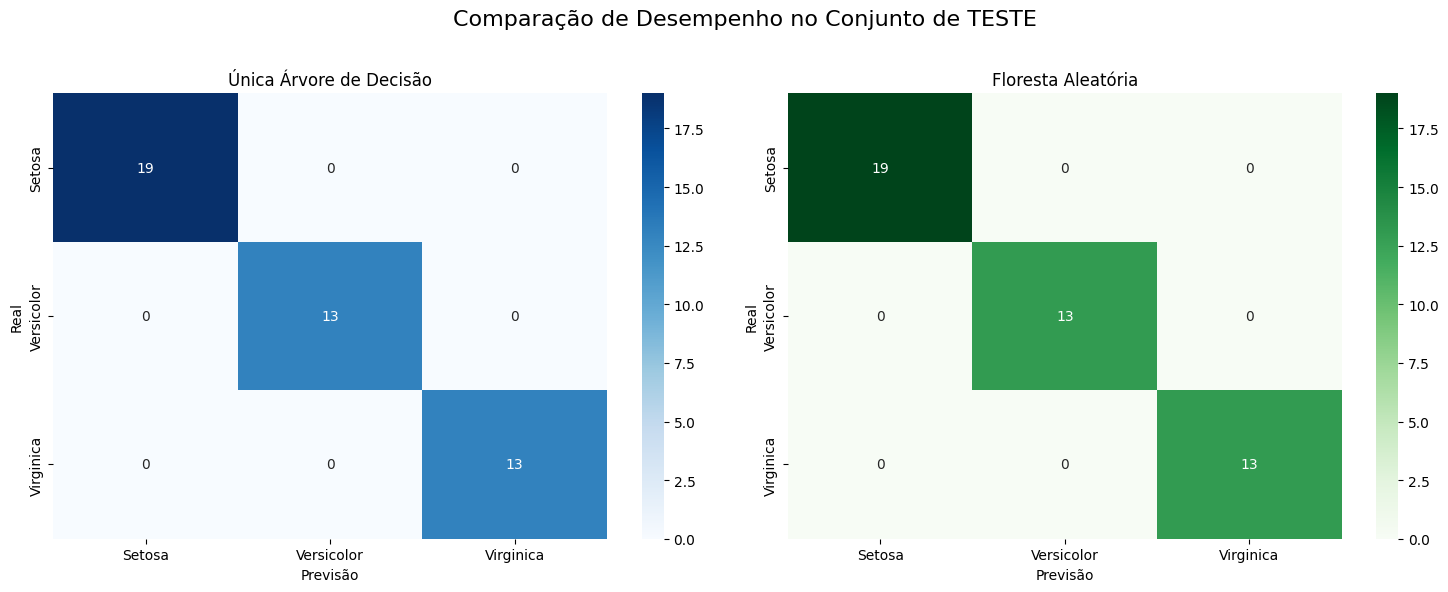

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Comparação de Desempenho no Conjunto de TESTE', fontsize=16)

# Matriz para a Árvore de Decisão
cm_arvore = confusion_matrix(y_test, pred_teste_arvore)
sns.heatmap(cm_arvore, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=floresta.classes_, yticklabels=floresta.classes_)
axes[0].set_title('Única Árvore de Decisão')
axes[0].set_xlabel('Previsão')
axes[0].set_ylabel('Real')

# Matriz para a Floresta Aleatória
cm_floresta = confusion_matrix(y_test, pred_teste_floresta)
sns.heatmap(cm_floresta, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=floresta.classes_, yticklabels=floresta.classes_)
axes[1].set_title('Floresta Aleatória')
axes[1].set_xlabel('Previsão')
axes[1].set_ylabel('Real')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
print("\nAnalisando as matrizes, podemos ver o número exato de erros e acertos.")
print(f"A Árvore Única errou {cm_arvore.sum() - cm_arvore.trace()} vezes.")
print(f"A Floresta Aleatória errou {cm_floresta.sum() - cm_floresta.trace()} vezes.")



Analisando as matrizes, podemos ver o número exato de erros e acertos.
A Árvore Única errou 0 vezes.
A Floresta Aleatória errou 0 vezes.


In [ ]:
# Uma grande vantagem da Floresta Aleatória é que ela pode nos dizer quais
# características (features) foram mais importantes para a tomada de decisão.

print("\n--- Importância das Features segundo a Floresta Aleatória ---")

# Criando uma série pandas para visualizar/analisar melhor
importancias = pd.Series(dataset_raw=floresta.feature_importances_, index=features_array.columns)
importancias


--- Importância das Features segundo a Floresta Aleatória ---


,0
sepal length (cm),0.104105
sepal width (cm),0.044605
petal length (cm),0.417308
petal width (cm),0.433982


In [ ]:
# Ordenando e pegando as 10 mais importantes
importancias_sorted = importancias.sort_values(ascending=False).head(10)
importancias_sorted

,0
petal width (cm),0.433982
petal length (cm),0.417308
sepal length (cm),0.104105
sepal width (cm),0.044605


/tmp/ipython-input-1495854787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_sorted, y=importancias_sorted.index, palette='viridis')


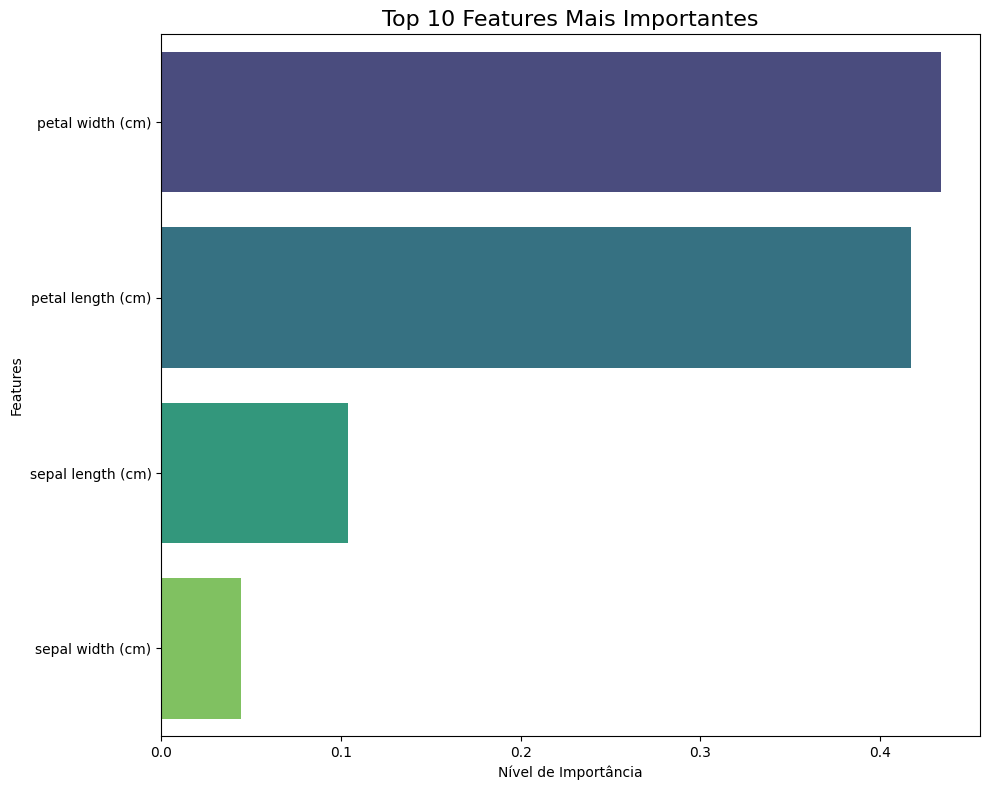

In [ ]:
# Criando o gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x=importancias_sorted, labels_array=importancias_sorted.index, palette='viridis')
plt.title('Top 10 Features Mais Importantes', fontsize=16)
plt.xlabel('Nível de Importância')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
print("\nO gráfico acima mostra quais exames/medidas o modelo mais utilizou para")
print("diferenciar um tumor maligno de um benigno. Uma informação muito valiosa!")


O gráfico acima mostra quais exames/medidas o modelo mais utilizou para
diferenciar um tumor maligno de um benigno. Uma informação muito valiosa!


# Perguntas

In [ ]:

# 1. A única Árvore de Decisão sofreu overfitting neste novo dataset? Compare as
# acurácias de treino e teste para justificar sua resposta.

# R: Não, pois as acurácias de treino e teste são iguais, indicando que o algoritmo
# generalizou bem os conjunto de dados.

In [ ]:
# 2. A Floresta Aleatória teve um desempenho superior ao da única árvore no conjunto
# de teste?

# R: não, pois ambos os desempenhos foram equivalentes (accuracy_score_val. = 1.0)

In [ ]:
# 3. De acordo com o gráfico acima, qual foi a característica mais relevante
# que o algoritmo usou para classificar as espécies de flores?

# R: A largura da pétala, com importância em torno de 0.44.